# Twitter Sentiment Analysis of any Twitter Handle or Hashtag
Problem Description: Your task is to develop an AI system capable of performing sentiment analysis on the tweets of any given Twitter handle or associated with a specific hashtag. The system should be able to analyze the text of the tweets, categorize them as positive, negative, or neutral, and provide an overall sentiment distribution.

Input: Tweets from a specific Twitter handle or associated with a specific hashtag. The system should be designed to handle a large volume of tweets and diverse language use, including slang, abbreviations, and emojis.

Output: Percentage distribution of positive, negative, and neutral sentiments among the analyzed tweets. The system should provide a clear breakdown of the sentiment distribution, offering insights into the overall sentiment associated with the given Twitter handle or hashtag.

In [59]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
import pandas as pd
import time
import tkinter as tk
from tkinter import messagebox
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import langid

In [79]:
def submit():
    global celebrity
    celebrity = entry_name.get()
    number_tweets = int(no_of_tweets.get())
    window.destroy()
    
    driver = webdriver.Chrome()
    driver.get('https://twitter.com/i/flow/login')
    time.sleep(2)
    
    login = driver.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[5]/label/div/div[2]/div/input')
    login.send_keys('aiamplify123')
    login.send_keys(Keys.ENTER)
    time.sleep(2)
    
    password = driver.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input')
    password.send_keys('twitter123')
    time.sleep(2)
    loginButton = driver.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[2]/div/div[1]/div/div/div/div').click()
    time.sleep(4)
    search = driver.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[2]/div/div[2]/div/div/div/div[1]/div/div/div/form/div[1]/div/div/div/label/div[2]/div/input')
    search.send_keys(celebrity)
    search.send_keys(Keys.ENTER)
    time.sleep(2)
    
    if '#' in celebrity:
        pass
    else:
        peopleButton = driver.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div[2]/nav/div/div[2]/div/div[3]/a/div/div/span').click()
        time.sleep(2)
    
    profile = driver.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[3]/section/div/div/div/div/div[1]/div/div/div/div/div[2]/div/div[1]/div/div[1]/a/div/div[1]/span/span[1]').click()
    time.sleep(2)
    
    soup = BeautifulSoup(driver.page_source, 'lxml')
    postings = soup.find_all('div', class_ = 'css-901oao r-1nao33i r-37j5jr r-a023e6 r-16dba41 r-rjixqe r-bcqeeo r-bnwqim r-qvutc0')
    
    tweets = []
    
    while True:
        for post in postings:
            tweets.append(post.text)
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
        time.sleep(1)
        soup = BeautifulSoup(driver.page_source, 'lxml')
        postings = soup.find_all('div', class_ = 'css-901oao r-1nao33i r-37j5jr r-a023e6 r-16dba41 r-rjixqe r-bcqeeo r-bnwqim r-qvutc0')
        tweets2 = list(set(tweets))
        if len(tweets2)>number_tweets:
            break
    
    df = pd.DataFrame({'Tweets':['']})
    for tweet in tweets2:
        df = df.append({'Tweets':tweet}, ignore_index=True)
    
    messagebox.showinfo("Notification", "Tweets Fetching Completed")
    #exports the data as a csv
    df.to_csv(f'D:\\Twitter Sentiment Analysis\\csv\\{celebrity}.csv')
        
window = tk.Tk()
window.title("Twitter Tweets Search")

# Calculate the screen width and height
screen_width = window.winfo_screenwidth()
screen_height = window.winfo_screenheight()

# Set the size of the popup window to 80% of the screen
popup_width = int(screen_width * 0.5)
popup_height = int(screen_height * 0.3)

# Center the window on the screen
x_position = int((screen_width - popup_width) / 2)
y_position = int((screen_height - popup_height) / 2)

# Set the window dimensions and position
window.geometry(f"{popup_width}x{popup_height}+{x_position}+{y_position}")

# Create labels and entry fields 
label_handle = tk.Label(window, text="Twitter Handle or HashTags")
label_handle.pack()
entry_name = tk.Entry(window, width=60)
entry_name.pack()

label_length = tk.Label(window, text="Number of Tweets")
label_length.pack()
no_of_tweets = tk.Entry(window, width=60)
no_of_tweets.pack()
# Create a submit button
submit_button = tk.Button(window, text="Submit", command=submit)
submit_button.pack()

# Start the main GUI loop
window.mainloop()


C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_7060\1866008976.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_7060\1866008976.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_7060\1866008976.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Tweets':tweet}, ignore_index=True)
C:\Users\Saurav Singh\AppData\Local\Temp\ipykernel_7060\1866008976.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.

In [80]:

# Function to remove emojis from the text
def remove_emojis(text):
    emoji_pattern = re.compile(
        pattern="["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F700-\U0001F77F"  # alchemical symbols
                u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                u"\U00002702-\U000027B0"  # Dingbats
                u"\U000024C2-\U0001F251"  # enclosed characters
                "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Function to analyze sentiment
def analyze_sentiment(tweet_text):
    # Remove emojis from the text
    cleaned_text = remove_emojis(str(tweet_text))  # Convert to string
    
    # Perform sentiment analysis
    analysis = TextBlob(cleaned_text)
    sentiment_score = analysis.sentiment.polarity
    
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'
    
# Function to check if a tweet is in Hindi
def is_hindi_tweet(tweet_text):
    if isinstance(tweet_text, str):  # Check if the tweet_text is a string
        lang, _ = langid.classify(tweet_text)
        return lang == 'hi'
    return False  # Return False for non-string values (NaN, etc.)


# Read the CSV file into a pandas DataFrame
df = pd.read_csv(f'D:\\Twitter Sentiment Analysis\\csv\\{celebrity}.csv')

# Perform sentiment analysis on the tweets in the DataFrame
df['Language'] = df['Tweets'].apply(lambda tweet: 'hi' if is_hindi_tweet(tweet) else 'en')
df['Sentiment'] = df['Tweets'].apply(analyze_sentiment)

# Perform sentiment analysis on the tweets in the DataFrame
df['Sentiment'] = df['Tweets'].astype(str).apply(analyze_sentiment)  # Convert to string before applying

# Count the number of English and Hindi tweets
num_english_tweets = df[df['Language'] == 'en'].shape[0]
num_hindi_tweets = df[df['Language'] == 'hi'].shape[0]

print("Number of English tweets:", num_english_tweets)
print("Number of Hindi tweets:", num_hindi_tweets)
# Print the DataFrame with the 'Sentiment' column
#print(df)

Number of English tweets: 12
Number of Hindi tweets: 0


Percentage distribution of sentiments:
Positive: 66.67%
Negative: 16.67%
Neutral: 16.67%


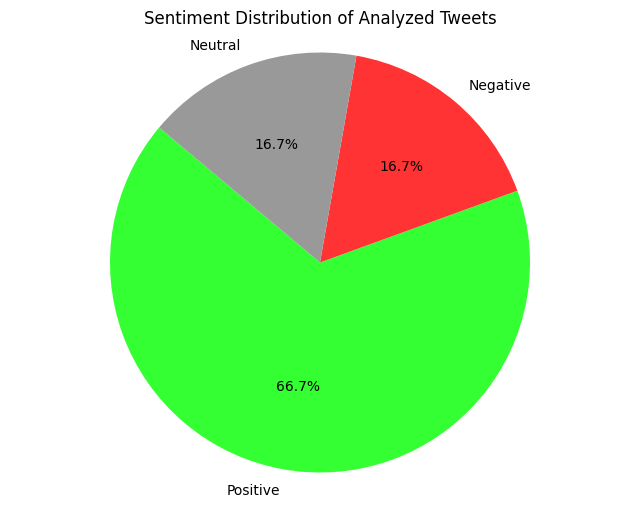

This Twitter Handle give Positive Sentiment to Society


In [81]:
# Calculate the sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts(normalize=True) * 100

# Output the results
print("Percentage distribution of sentiments:")
print("Positive: {:.2f}%".format(sentiment_distribution.get('positive')))
print("Negative: {:.2f}%".format(sentiment_distribution.get('negative')))
print("Neutral: {:.2f}%".format(sentiment_distribution.get('neutral')))
# Data for sentiment distribution
labels = ['Positive', 'Negative', 'Neutral']
sizes = [sentiment_distribution['positive'], sentiment_distribution['negative'], sentiment_distribution['neutral']]
colors = ['#33ff33', '#ff3333', '#999999']  # Green for positive, Red for negative, Gray for neutral

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Sentiment Distribution of Analyzed Tweets')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

if 'postive'> 'negative':
    print("This Twitter Handle give Positive Sentiment to Society")
elif 'negative'> 'neutral':
    print("This Twitter Handle give Negative Sentiment to Society")
else:
    print("This Twitter Handle give Neutral Sentiment to Society")

In [82]:
df.shape

(12, 4)

In [84]:
#exports the data as a csv in which sentiments data are updated
df.to_csv(f'D:\\Twitter Sentiment Analysis\\csv\\{celebrity}.csv')